In [ ]:
import pandas as pd

In [ ]:
m12 = pd.read_csv('evasão_12.csv')
m13 = pd.read_csv('evasão_13.csv')
m14 = pd.read_csv('evasão_14.csv')
m15 = pd.read_csv('evasão_15.csv')
m16 = pd.read_csv('evasão_16.csv')

In [ ]:
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
m12['Ano']=2012
m13['Ano']=2013
m14['Ano']=2014
m15['Ano']=2015
m16['Ano']=2016

In [ ]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [ ]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Unificada_Multietapa']

In [ ]:
evasao = pd.get_dummies(evasao, columns=['Status'])

In [ ]:
evasao.Idade.describe()

count    829709.000000
mean         10.066539
std           2.670104
min           1.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          66.000000
Name: Idade, dtype: float64

In [ ]:
evasao = evasao[evasao.Idade>5]
evasao = evasao[evasao.Idade<18]

In [ ]:
evasao.Idade.describe()

count    827663.000000
mean         10.040625
std           2.605638
min           6.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          17.000000
Name: Idade, dtype: float64

In [ ]:
evasao.drop(columns=['Status_aprovado', 'Status_repetente', 'ID', 'Ano', 'ID_escola'], inplace=True)

In [ ]:
evasao.to_csv('evasao2.csv')

In [ ]:
evasao = evasao.fillna(0)
evasao_features = evasao.drop(columns=['Status_evadido']).values
evasao_target = evasao['Status_evadido'].values

In [ ]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.919484
1    0.080516
Name: Status_evadido, dtype: float64

In [ ]:
#Undersampling
y1 = evasao[evasao['Status_evadido']==1]
y0 = evasao[evasao['Status_evadido']==0]

In [ ]:
y0_novo = y0.sample(n=len(y1))

In [ ]:
y_novo = pd.concat([y1, y0_novo])
y_novo['Status_evadido'].unique()

array([1, 0], dtype=uint8)

In [ ]:
x_novo = y_novo.drop(columns=['Status_evadido']).values
y_novo = y_novo['Status_evadido'].values
print(x_novo.shape, y_novo.shape)


(133280, 39) (133280,)


In [ ]:
from sklearn.model_selection import train_test_split
evasao_train, evasao_test, status_evadido_train, status_evadido_test = train_test_split(x_novo, y_novo, test_size = 0.2, random_state = 0)

In [ ]:
#Buscando melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
min_samples = [2, 10, 50, 200, 1000]
n_est = [10, 20, 50, 100]
crit = ['entropy', 'gini']
for s in range(len(min_samples)):
  for n in range(len(n_est)):
    for c in range(len(crit)):
      print(s, n, c)
      print("n_estimators = ",  n_est[n], ", criterion = ", crit[c], ", min_samples_split = ", min_samples[s])
      classifier_RF = RandomForestClassifier(n_estimators = n_est[n], criterion = crit[c], min_samples_split = min_samples[s], random_state = 0)
      classifier_RF.fit(evasao_train, status_evadido_train)
      status_evadido_pred_RF = classifier_RF.predict(evasao_test)
      acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
      print("Acuracia: ", acuracia_RF)
      cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
      print("Confusion Matrix: ")
      print(cm_RF)
      print()

0 0 0
n_estimators =  10 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.6409813925570228
Confusion Matrix: 
[[8597 4755]
 [4815 8489]]

0 0 1
n_estimators =  10 , criterion =  gini , min_samples_split =  2
Acuracia:  0.6407938175270108
Confusion Matrix: 
[[8602 4750]
 [4825 8479]]

0 1 0
n_estimators =  20 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.640343637454982
Confusion Matrix: 
[[8740 4612]
 [4975 8329]]

0 1 1
n_estimators =  20 , criterion =  gini , min_samples_split =  2
Acuracia:  0.640906362545018
Confusion Matrix: 
[[8744 4608]
 [4964 8340]]

0 2 0
n_estimators =  50 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.640906362545018
Confusion Matrix: 
[[8609 4743]
 [4829 8475]]

0 2 1
n_estimators =  50 , criterion =  gini , min_samples_split =  2
Acuracia:  0.6412064825930373
Confusion Matrix: 
[[8616 4736]
 [4828 8476]]

0 3 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.640718787515006
Confusion

KeyboardInterrupt: 

In [ ]:
#melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_RF = RandomForestClassifier(n_estimators =  50 , criterion =  "entropy" , min_samples_split =  50, random_state = 0)
classifier_RF.fit(evasao_train, status_evadido_train)
status_evadido_pred_RF = classifier_RF.predict(evasao_test)
acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
print("Acuracia: ", acuracia_RF)
cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
print("Confusion Matrix: ")
print(cm_RF)
print()

Acuracia:  0.6440951380552221
Confusion Matrix: 
[[8579 4773]
 [4714 8590]]



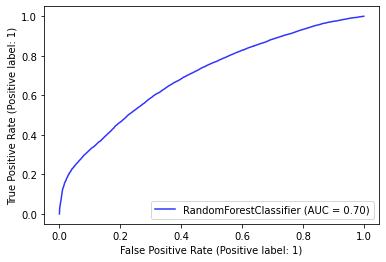

In [ ]:
#ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier_RF, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'blue')
#svc_disp = plot_roc_curve(classifier_SVM, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'green')
plt.show()

In [ ]:
#Predict_proba
from pandas import DataFrame
from IPython.display import HTML
from random import sample
sample_evasao_test = sample(list(evasao_test),20)
pred_prob_RF = classifier_RF.predict_proba(sample_evasao_test)
HTML('<h1>Random Forest predict_proba</h1>'+DataFrame(pred_prob_RF).to_html())

,0,1
0,0.177140,0.822860
1,0.801320,0.198680
2,0.111670,0.888330
3,0.210055,0.789945
4,0.625311,0.374689
5,0.094846,0.905154
6,0.443587,0.556413
7,0.550486,0.449514
8,0.597877,0.402123
9,0.730702,0.269298


Status_evadido
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: predict_proba_RF, dtype: object

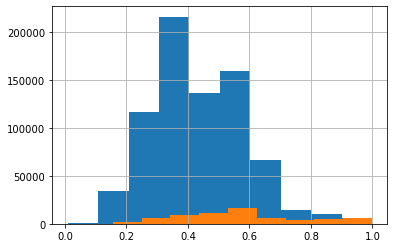

In [ ]:
y_predict = classifier_RF.predict(evasao_features)
evasao['y_pred'] = y_predict
evasao['predict_proba_RF'] = classifier_RF.predict_proba(evasao_features)[:,1]
evasao.groupby('Status_evadido')['predict_proba_RF'].hist()

In [ ]:
q = evasao['predict_proba_RF'].quantile([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
q

0.0    0.008636
0.1    0.245612
0.2    0.310348
0.3    0.340125
0.4    0.377355
0.5    0.421708
0.6    0.482593
0.7    0.532623
0.8    0.573305
0.9    0.626470
1.0    0.998710
Name: predict_proba_RF, dtype: float64

In [ ]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.919484
1    0.080516
Name: Status_evadido, dtype: float64

In [ ]:
q = evasao['predict_proba_RF'].quantile([0.30, 0.60, 0.859, 1.00])
q = pd.DataFrame(q)
q.columns = ['prob']
q

,prob
0.300,0.340125
0.600,0.482593
0.859,0.606996
1.000,0.998710


In [ ]:
analise_RF = {'Risco de Evasao':["Baixo", "Médio-baixo", "Médio-alto", "Alto"], 'Probab. de Evasão': ["Até 11%", "entre 11% e 24,5%", "entre 24,5% e 80%", "entre 80% e 100%"], '% da população': ["30%", "30%", "25,6%", "14,4%"]}
analise_RF = pd.DataFrame.from_dict(analise_RF, orient='columns')
analise_RF

,Risco de Evasao,Probab. de Evasão,% da população
0,Baixo,Até 11%,30%
1,Médio-baixo,"entre 11% e 24,5%",30%
2,Médio-alto,"entre 24,5% e 80%","25,6%"
3,Alto,entre 80% e 100%,"14,4%"


Feature: 0, Score: 0.52767
Feature: 1, Score: 0.01143
Feature: 2, Score: 0.00042
Feature: 3, Score: 0.00167
Feature: 4, Score: 0.00180
Feature: 5, Score: 0.00108
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00248
Feature: 8, Score: 0.00992
Feature: 9, Score: 0.00086
Feature: 10, Score: 0.00147
Feature: 11, Score: 0.00064
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00219
Feature: 14, Score: 0.00139
Feature: 15, Score: 0.14361
Feature: 16, Score: 0.01412
Feature: 17, Score: 0.00176
Feature: 18, Score: 0.00868
Feature: 19, Score: 0.00739
Feature: 20, Score: 0.00384
Feature: 21, Score: 0.02861
Feature: 22, Score: 0.01603
Feature: 23, Score: 0.00622
Feature: 24, Score: 0.00771
Feature: 25, Score: 0.00030
Feature: 26, Score: 0.00240
Feature: 27, Score: 0.00004
Feature: 28, Score: 0.00138
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.07632
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00020
Feature: 33, Score: 0.00340
Feature: 34, Score: 0.00485
Feature: 35, Score: 0.06325
Fe

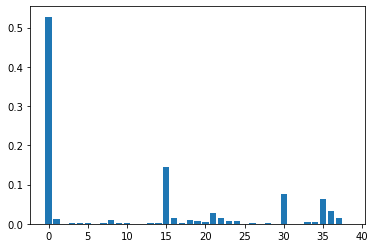

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# get importance
importance = classifier_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import numpy as np

importances = classifier_RF.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)

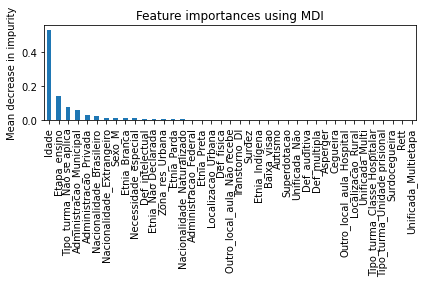

In [ ]:
forest_importances = pd.Series(importances, index=evasao.drop(columns=['Status_evadido', 'y_pred', 'predict_proba_RF',
                                                                       ]).columns.tolist())

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
evasao2 = evasao[['Status_evadido', 'Idade']]

In [ ]:
total = evasao2.groupby('Idade').count()

In [ ]:
evadido = evasao2[evasao2.Status_evadido==1].groupby('Idade').count()

In [ ]:
evadido/total

,Status_evadido
Idade,
6.0,0.061322
7.0,0.057862
8.0,0.056356
9.0,0.051702
10.0,0.080094
11.0,0.079981
12.0,0.070513
13.0,0.064981
14.0,0.128464


In [ ]:
#curva roc, score probabilidade para todo o dataset classe.predict_proba, estudo de KomogorovSmirnoff (distâncias das classes negativas vs. classes positivas)
#histogram das distribuições de cada classe/decis e criar uma label por decis, feature importance, otimizar modelo grid search
#MLOPS - ML Operations (operacionalizar o modelo provido pelo cientista de dados)
#DataOps - Entrega em estruturas